In [152]:
#PARTII

#Uploading the Dataset
# BEGIN_YOUR_CODE
from google.colab import files
uploaded = files.upload()
# END_YOUR_CODE

Saving diamond.csv to diamond.csv


In [153]:
# Reading the Dataset
import io
import pandas as pd
import numpy as np
data=pd.read_csv(io.BytesIO(uploaded['diamond.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [154]:
#Main Statistics of the Dataset
print("The statistical analysis of the Dataset is:","\n", data.columns)

The statistical analysis of the Dataset is: 
 Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [155]:
#Main Statistics of the Dataset 

print("The Shape of the Dataset is:", data.shape)
data1=data.dropna()
print("The Shape of the Dataset after removing the [NAN values] is:", data.shape)

The Shape of the Dataset is: (53940, 10)
The Shape of the Dataset after removing the [NAN values] is: (53940, 10)


In [156]:
#Main Statistics of the Dataset
print("The statistical analysis of the Dataset is:","\n", data.describe())

The statistical analysis of the Dataset is: 
               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle

In [158]:
data.corr().round(3)

,carat,depth,table,price,x,y,z
carat,1.000,0.028,0.182,0.922,0.975,0.952,0.953
depth,0.028,1.000,-0.296,-0.011,-0.025,-0.029,0.095
table,0.182,-0.296,1.000,0.127,0.195,0.184,0.151
price,0.922,-0.011,0.127,1.000,0.884,0.865,0.861
x,0.975,-0.025,0.195,0.884,1.000,0.975,0.971
y,0.952,-0.029,0.184,0.865,0.975,1.000,0.952
z,0.953,0.095,0.151,0.861,0.971,0.952,1.000


Text(0.5, 1.0, 'Heatmap')

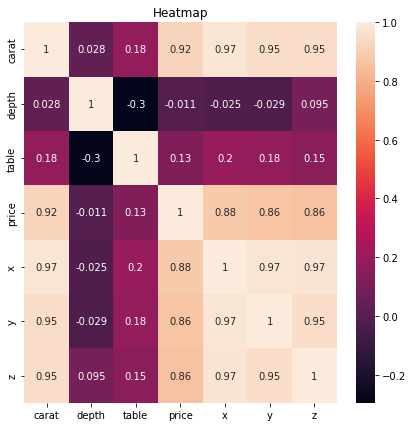

In [103]:
# heatmap by seaborn library
plt.figure(figsize=(7,7))
plot=sns.heatmap(data.corr().round(3), annot=True)
plt.title("Heatmap")

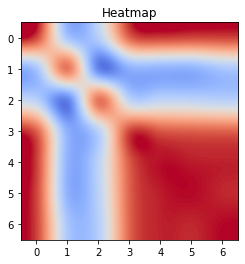

In [104]:
# heatmap by seaborn matplotlib
plt.imshow(data.corr().round(3), cmap='coolwarm', interpolation='mitchell')
plt.title("Heatmap")
plt.show()

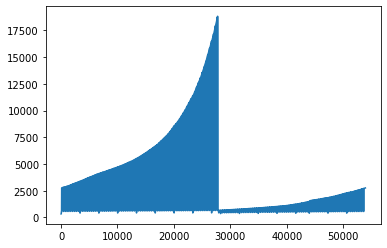

In [105]:
plt.plot(data.price)
plt.show()

<AxesSubplot:xlabel='all', ylabel='price'>

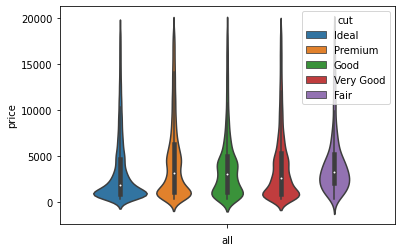

In [106]:
data['all'] = ""
sns.violinplot(x='all', y='price', data=data, hue='cut')

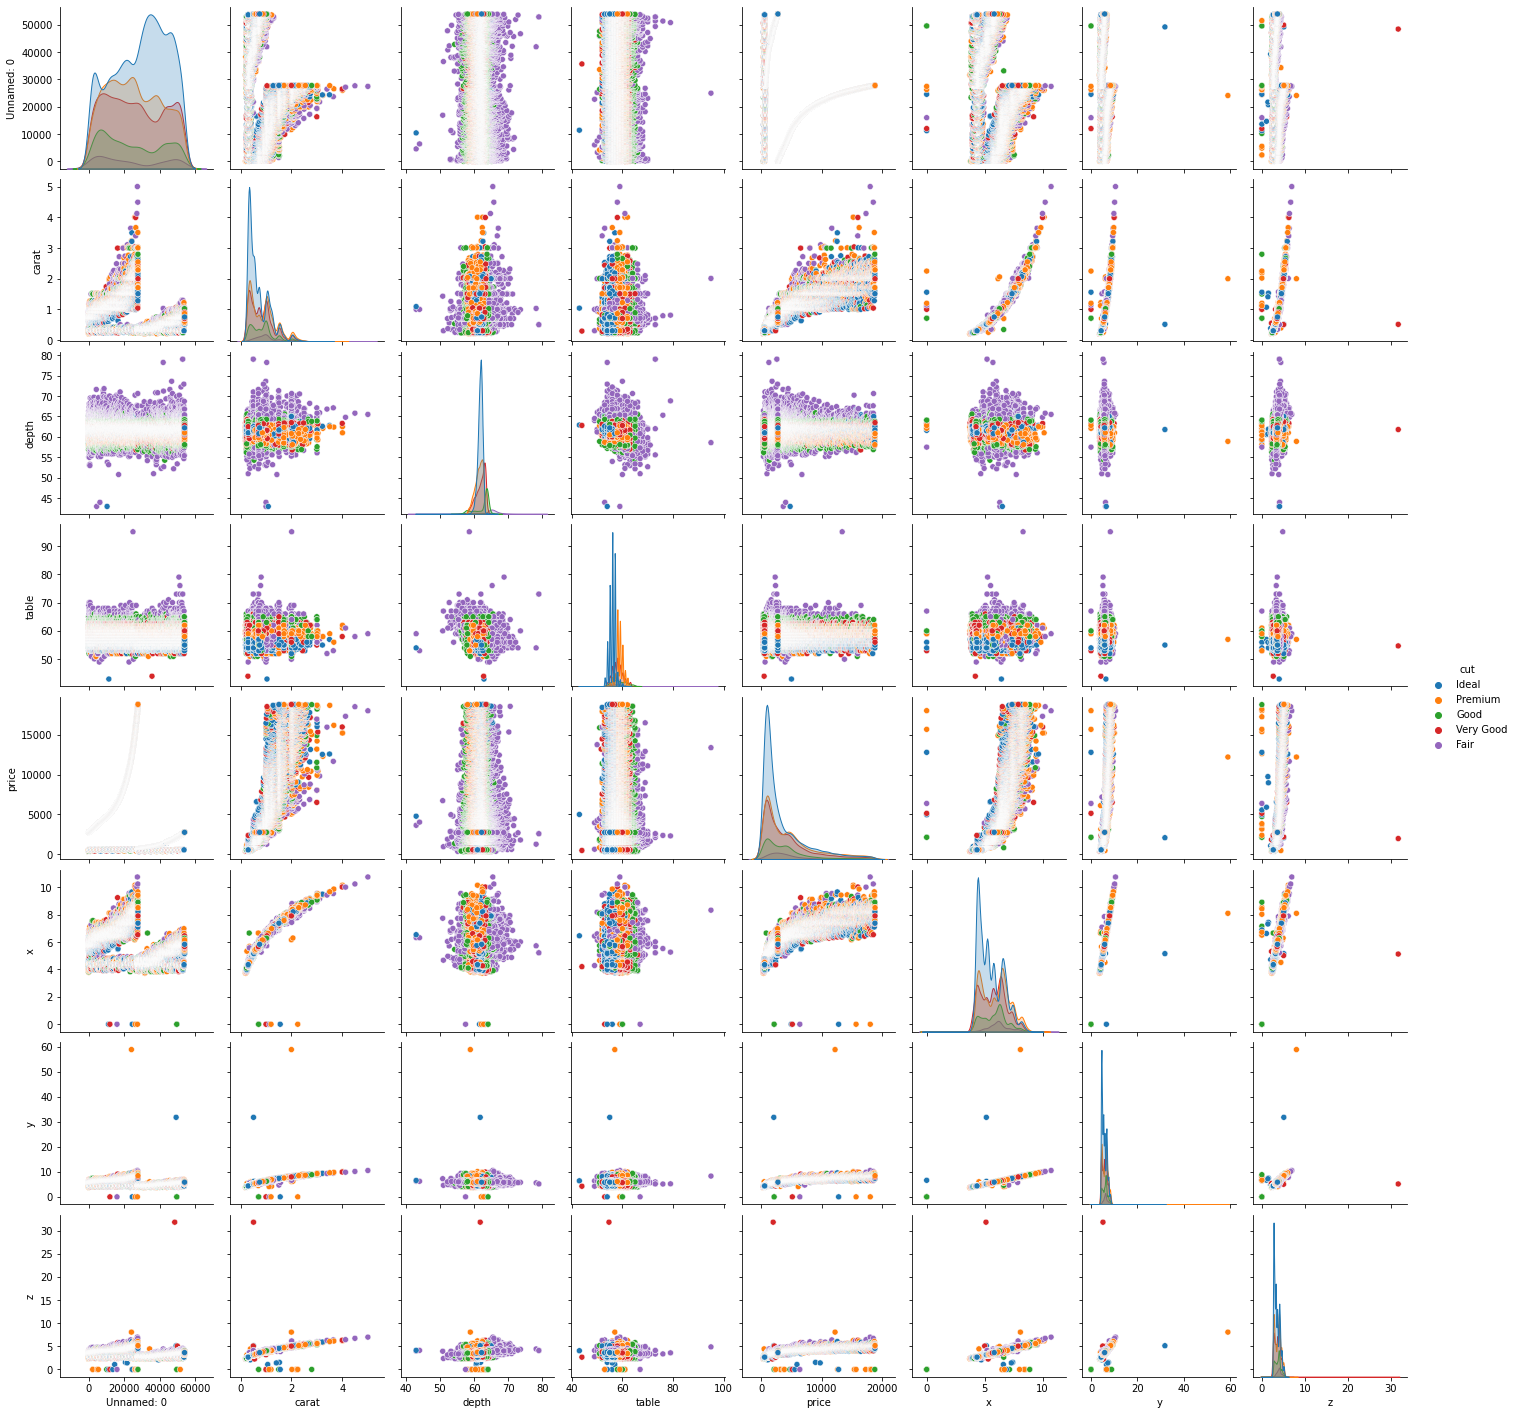

In [ ]:
sns.pairplot(data,hue='cut')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

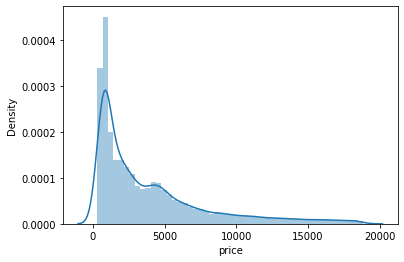

In [107]:
sns.distplot(data['price'])

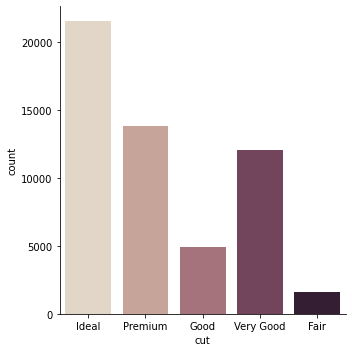

In [108]:
sns.catplot(data=data, x="cut", kind="count", palette="ch:.25")

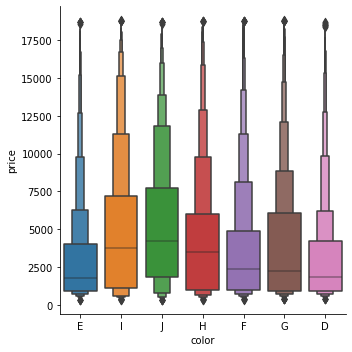

In [ ]:
sns.catplot(data=data, x="color", y="price", kind="boxen")

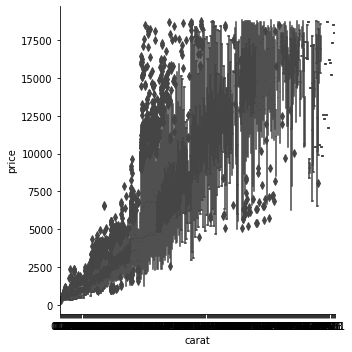

In [ ]:
sns.catplot(data=data, x="carat", y="price", kind="box")

In [159]:
# Read data, encode it, normalize it, divide it into train and test
def prepare_data(filename, target, normalize_columns = None, drop_columns = None, encode_columns = None):
    
    # Load the data and print statistics
    data = pd.read_csv(filename)
    data = data.dropna()
    if drop_columns:
        data = data.drop(columns = drop_columns)
    data_statistics = data.describe()
    
    # Normalize the data
    if normalize_columns:
        for column in normalize_columns:
            data[column] = data[column].apply(lambda x: (x - data[column].min()) / (data[column].max() - data[column].min()))
    
    # Encode the data
    if encode_columns:
        for column in encode_columns:
            uniques = data[column].unique()
            di = {value:key + 1 for key, value in enumerate(uniques)}
            data[column] = data[column].replace(di)

    # Divide the train, test data
    y_data = data[target]
    X_data = data.drop(columns = [target])
    # X_data = pd.DataFrame(np.hstack((np.ones((X_data.shape[0], 1)), X_data)))
    X_data = np.hstack((np.ones((X_data.shape[0], 1)), X_data))

    # Doesn't shuffle the dataset order
    divider = int(((len(X_data) * 80) / 100) + 1)
    X_train = X_data[:divider]
    X_test = X_data[divider:]
    y_train = y_data[:divider]
    y_test = y_data[divider:]
    
    
    return data_statistics, X_train, X_test, y_train, y_test

In [160]:
class LinearRegression():

    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        # error = np.mean(np.square(y - X.dot(self.weights)))
        a = y - X.dot(self.weights)
        error = np.sum(a.T.dot(a)) / 2
        
        return self.weights, error
    
    def predict(self, X):
        y_pred = X.dot(self.weights)
        
        return y_pred

In [161]:
data_statistics, X_train, X_test, y_train, y_test = prepare_data(
    filename = 'diamond.csv',
    target = 'depth',
    normalize_columns = ['depth', 'table', 'price', 'x', 'y', 'z'],
    encode_columns = ['cut', 'color', 'clarity'])
print("The shape of [X_train] is:", X_train.shape)
print("The shape of [y_train] is:", y_train.shape)
print("The shape of [X_test] is:", X_test.shape)
print("The shape of [y_test] is:", y_test.shape)

The shape of [X_train] is: (43153, 10)
The shape of [y_train] is: (43153,)
The shape of [X_test] is: (10787, 10)
The shape of [y_test] is: (10787,)


In [162]:
# Initialize model with learning rate and no.of iterations
linear_regression = LinearRegression()

# Fit the data
weights, error = linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

print('The produced Weights are:\n', weights)
print('\nThe Mean Square Error equals to:\n', error)
print('\ny_predictions:\n', y_pred)

The produced Weights are:
 [ 6.23815066e-01  5.49654706e-02  4.79063251e-03  2.88082775e-04
 -3.59821276e-04 -2.06978553e-01 -3.02400471e-02 -1.33189269e+00
 -1.14113017e+00  6.53930531e+00]

The Mean Square Error equals to:
 14.312571431128262

y_predictions:
 [0.52117836 0.49127107 0.55295374 ... 0.53122872 0.50562253 0.53155462]


<ipython-input-163-0b1f41c7a505>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')


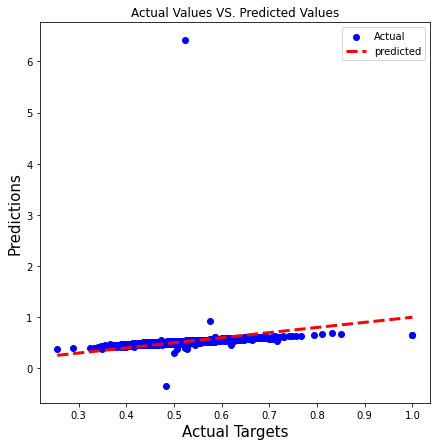

In [163]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color = 'blue', label = 'Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')

plt.xlabel('Actual Targets', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Actual Values VS. Predicted Values')
plt.legend()
plt.show()


In [164]:
import pickle
with open( "PARTII.p", "ba+" ) as fp:
    pickle.dump(weights, fp)

In [165]:
pickle.load(open( "PARTII.p", "rb" ))

array([ 6.23815066e-01,  5.49654706e-02,  4.79063251e-03,  2.88082775e-04,
       -3.59821276e-04, -2.06978553e-01, -3.02400471e-02, -1.33189269e+00,
       -1.14113017e+00,  6.53930531e+00])

In [166]:
#PARTIII

#Uploading the Dataset
# BEGIN_YOUR_CODE
from google.colab import files
uploaded = files.upload()
# END_YOUR_CODE

Saving diamond.csv to diamond (1).csv


In [167]:
# Reading the Dataset
import io
import pandas as pd
import numpy as np
data=pd.read_csv(io.BytesIO(uploaded['diamond.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [168]:
# Read data, encode it, normalize it, divide it into train and test
def prepare_data2(filename, target, normalize_columns = None, drop_columns = None, encode_columns = None):
    
    # Load the data and print statistics
    data = pd.read_csv(filename)
    data = data.dropna()
    if drop_columns:
        data = data.drop(columns = drop_columns)
    data_statistics = data.describe()
    
    # Normalize the data
    if normalize_columns:
        for column in normalize_columns:
            data[column] = data[column].apply(lambda x: (x - data[column].min()) / (data[column].max() - data[column].min()))
    
    # Encode the data
    if encode_columns:
        for column in encode_columns:
            uniques = data[column].unique()
            di = {value:key + 1 for key, value in enumerate(uniques)}
            data[column] = data[column].replace(di)

    # Divide the train, test data
    y_data = data[target]
    X_data = data.drop(columns = [target])
    X_data = np.hstack((np.ones((X_data.shape[0], 1)), X_data))

    # Doesn't shuffle the dataset order
    divider = int(((len(X_data) * 80) / 100) + 1)
    X_train = X_data[:divider]
    X_test = X_data[divider:]
    y_train = y_data[:divider]
    y_test = y_data[divider:]
    
    
    return data_statistics, X_train, X_test, y_train, y_test


In [169]:
class LinearRegression2():

    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        alpha = 0.01
        multi = X.T.dot(X)
        identity = alpha * np.identity(multi.shape[0])
        self.weights = np.linalg.inv(multi + identity).dot(X.T).dot(y)
        a = y - X.dot(self.weights)
        b = alpha * self.weights.dot(self.weights) / 2
        error = np.sum(a.T.dot(a) + b) / 2
        # error = np.mean(np.square(y - X.dot(self.weights)))
        
        return self.weights, error
    
    def predict(self, X):
        y_pred = X.dot(self.weights)
        
        return y_pred

In [170]:
data_statistics, X_train, X_test, y_train, y_test = prepare_data2(
    filename = 'diamond.csv',
    target = 'depth',
    normalize_columns = ['depth', 'table', 'price', 'x', 'y', 'z'],
    encode_columns = ['cut', 'color', 'clarity']
)
print("The shape of [X_train] is:", X_train.shape)
print("The shape of [y_train] is:", y_train.shape)
print("The shape of [X_test] is:", X_test.shape)
print("The shape of [y_test] is:", y_test.shape)

The shape of [X_train] is: (43153, 10)
The shape of [y_train] is: (43153,)
The shape of [X_test] is: (10787, 10)
The shape of [y_test] is: (10787,)


In [171]:
# Initialize model with learning rate and no.of iterations
linear_regression = LinearRegression2()

# # Fit the data
weights, error = linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)


print('The produced Weights are:\n', weights)
print('\nThe Mean Square Error equals to:\n', error)
print('\ny_predictions:\n', y_pred)

The produced Weights are:
 [ 6.25458250e-01  5.57077933e-02  4.88252640e-03  2.91084988e-04
 -3.60734543e-04 -2.10575140e-01 -3.06529646e-02 -1.31237992e+00
 -1.11509840e+00  6.41061935e+00]

The Mean Square Error equals to:
 14.428213779935813

y_predictions:
 [0.52097752 0.49131936 0.5522713  ... 0.5309355  0.50575083 0.53143867]


In [172]:
# Fit the data
weights, error = linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
print('The produced Weights are:\n', weights)
print('\nThe Mean Square Error equals to:\n', error)
print('\ny_predictions:\n', y_pred)

The produced Weights are:
 [ 6.25458250e-01  5.57077933e-02  4.88252640e-03  2.91084988e-04
 -3.60734543e-04 -2.10575140e-01 -3.06529646e-02 -1.31237992e+00
 -1.11509840e+00  6.41061935e+00]

The Mean Square Error equals to:
 14.428213779935813

y_predictions:
 [0.52097752 0.49131936 0.5522713  ... 0.5309355  0.50575083 0.53143867]


<ipython-input-173-0b1f41c7a505>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')


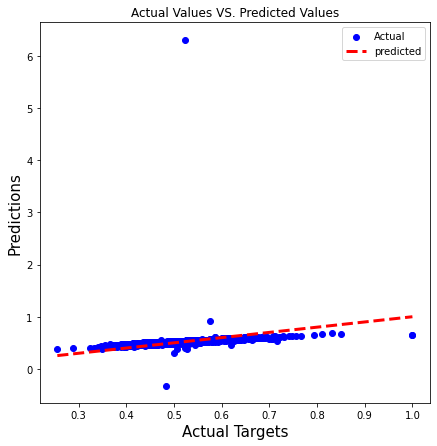

In [173]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color = 'blue', label = 'Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')

plt.xlabel('Actual Targets', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Actual Values VS. Predicted Values')
plt.legend()
plt.show()

In [174]:
import pickle
with open( "PARTIII.p", "ba+" ) as fp:
    pickle.dump(weights, fp)

In [175]:
pickle.load(open( "PARTIII.p", "rb" ))

array([ 6.25458250e-01,  5.57077933e-02,  4.88252640e-03,  2.91084988e-04,
       -3.60734543e-04, -2.10575140e-01, -3.06529646e-02, -1.31237992e+00,
       -1.11509840e+00,  6.41061935e+00])